In [2]:
import networkx as nx

# build a ER graph
G = nx.erdos_renyi_graph(100, 0.1)

In [4]:
# build a association matrix
A = nx.adjacency_matrix(G)


/var/folders/01/z1m0rbnx48jf6lx1g61vx93m0000gp/T/ipykernel_44636/2999680771.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [6]:
import numpy as np
amatrix = np.array(A.todense())

In [7]:
amatrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

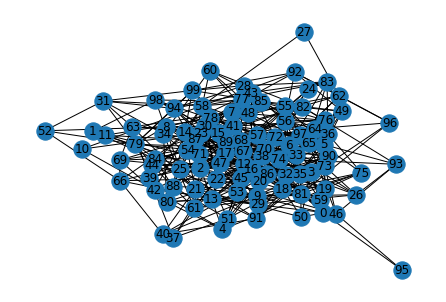

In [2]:
# show the graph
nx.draw(G, with_labels=True)

In [11]:
# for each node, we build an isolated cases
# the initial state is (N0-I0,I0,0,N0,β,γ)
# S0 is the initial number of susceptible individuals
# I0 is the initial number of infected individuals
# R0 is the initial number of recovered individuals
# N0 is the total population
# β is the infection rate
# γ is the recovery rate
#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.DataFrame({'S':[],'I':[],'R':[],'N':[],'β':[],'γ':[]})
for node in G:
    N0 = np.random.randint(100,1000)
    I0 = np.random.randint(1,10)
    S0 = N0 - I0
    R0 = 0
    β = np.random.normal(2,0.1)
    γ = np.random.normal(1,0.1)
    dataframe = pd.concat([dataframe, pd.DataFrame({'S':[S0],'I':[I0],'R':[R0],'N':[N0],'β':[β],'γ':[γ],'loc':[node],'time':[0]})], ignore_index=True)
    for time in range(1,50):
        S0 = S0 - β*S0*I0/N0
        I0 = I0 + β*S0*I0/N0 - γ*I0
        R0 = R0 + γ*I0
        S0 = int(S0)
        I0 = int(I0)
        R0 = int(R0)
        dataframe = pd.concat([dataframe,pd.DataFrame({'S':[S0],'I':[I0],'R':[R0],'N':[N0],'β':[β],'γ':[γ],'loc':[node],'time':[time]})],ignore_index=True)
dataframe




,S,I,R,N,β,γ,loc,time
0,161.0,9.0,0.0,170.0,1.928664,0.972260,0.0,0.0
1,144.0,15.0,14.0,170.0,1.928664,0.972260,0.0,1.0
2,119.0,20.0,34.0,170.0,1.928664,0.972260,0.0,2.0
3,91.0,21.0,54.0,170.0,1.928664,0.972260,0.0,3.0
4,69.0,17.0,70.0,170.0,1.928664,0.972260,0.0,4.0
...,...,...,...,...,...,...,...,...
4995,30.0,0.0,83.0,146.0,1.855248,0.833404,99.0,45.0
4996,30.0,0.0,83.0,146.0,1.855248,0.833404,99.0,46.0
4997,30.0,0.0,83.0,146.0,1.855248,0.833404,99.0,47.0
4998,30.0,0.0,83.0,146.0,1.855248,0.833404,99.0,48.0


<AxesSubplot:xlabel='time', ylabel='I'>

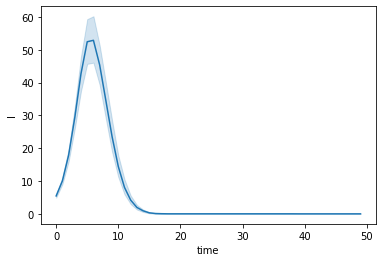

In [15]:
dataframe[dataframe['loc']==0]['I']

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='time',y='I',data = dataframe)